#  EE8230 - Final Research Project 📚✨

Hi, my name is Zahra Abbasi (Student Number: 500901622). 🙂
Here is my EE8230 project:

I used the Abalone dataset 🐚 to do multiclass classification of the target variable Sex, using the PyCaret library.

In [1]:
pip install pycaret[full]

Note: you may need to restart the kernel to use updated packages.


In [2]:
# check installed version
import pycaret
pycaret.__version__

'3.3.2'

### Loading the Dataset
In this step, I loaded the Abalone dataset from the UCI Machine Learning Repository using the ucimlrepo library. I separated the features and target, then combined them into a single DataFrame called data, which contains all input variables and the target variable Sex for later use in PyCaret.

In [3]:
!pip install ucimlrepo

In [4]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
  
abalone = fetch_ucirepo(id=1)

X = abalone.data.features
y = abalone.data.targets

# Combine into a single DataFrame
data = pd.concat([X, y], axis=1)

print(data.head())

  Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  


### Setup
I used PyCaret’s setup() to start a multiclass classification experiment on the Abalone data with Sex as the target, and session_id = 123 for reproducibility.

In [5]:
from pycaret.classification import *
s = setup(data, target = 'Sex', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Sex
2,Target type,Multiclass
3,Target mapping,"F: 0, I: 1, M: 2"
4,Original data shape,"(4177, 9)"
5,Transformed data shape,"(4177, 9)"
6,Transformed train set shape,"(2923, 9)"
7,Transformed test set shape,"(1254, 9)"
8,Numeric features,8
9,Preprocess,True


I created a new ClassificationExperiment object in PyCaret, which will be used to manage and run my classification workflows on the Abalone dataset.

In [6]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [7]:
# check the type of exp
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [8]:
# init setup on exp
exp.setup(data, target = 'Sex', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Sex
2,Target type,Multiclass
3,Target mapping,"F: 0, I: 1, M: 2"
4,Original data shape,"(4177, 9)"
5,Transformed data shape,"(4177, 9)"
6,Transformed train set shape,"(2923, 9)"
7,Transformed test set shape,"(1254, 9)"
8,Numeric features,8
9,Preprocess,True


I tested both ways of initializing PyCaret: the functional setup(data, target='Sex', ...) and the object-oriented ClassificationExperiment().setup(...). Both approaches produced identical models and performance metrics, so the choice of method does not affect the results and has been verified for consistency.

### Evaluation Metric Selection
For this 3-class classification task, I used overall Accuracy as the primary evaluation metric. The three classes in the Abalone dataset are reasonably balanced (approximately 36.6% M, 32.1% I, and 31.3% F), and there is no significant difference in the cost of misclassifying one class as another. Therefore, Accuracy provides an appropriate measure of model performance, directly reflecting the proportion of correctly classified instances.

In [9]:
# Simple check if Sex classes are balanced
print(data['Sex'].value_counts())
print("\nPercentages:")
print((data['Sex'].value_counts(normalize=True) * 100).round(1).astype(str) + "%")

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64

Percentages:
Sex
M    36.6%
I    32.1%
F    31.3%
Name: proportion, dtype: object


### Compare Models
All models are evaluated using PyCaret’s default 10-fold stratified cross-validation. The model with the highest mean Accuracy across the 10 folds is selected as the best-performing model. In this experiment, Logistic Regression achieved the highest mean Accuracy of 0.5542 and was therefore chosen as the 'best' model.

In [10]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5542,0.0000,0.5542,0.5455,0.5362,0.3257,0.3333,0.0720
ridge,Ridge Classifier,0.5491,0.0000,0.5491,0.5358,0.5304,0.3210,0.3279,0.0240
lda,Linear Discriminant Analysis,0.5484,0.0000,0.5484,0.5412,0.5394,0.3186,0.3216,0.0390
gbc,Gradient Boosting Classifier,0.5470,0.0000,0.5470,0.5358,0.5364,0.3161,0.3191,1.1600
rf,Random Forest Classifier,0.5436,0.7409,0.5436,0.5365,0.5384,0.3125,0.3135,0.3730
catboost,CatBoost Classifier,0.5412,0.7383,0.5412,0.5355,0.5370,0.3096,0.3103,2.5110
et,Extra Trees Classifier,0.5330,0.7361,0.5330,0.5250,0.5274,0.2973,0.2982,0.2390
lightgbm,Light Gradient Boosting Machine,0.5323,0.7334,0.5323,0.5262,0.5282,0.2960,0.2966,0.1640
ada,Ada Boost Classifier,0.5316,0.0000,0.5316,0.5142,0.5086,0.2920,0.2995,0.1360
qda,Quadratic Discriminant Analysis,0.5265,0.0000,0.5265,0.5136,0.4942,0.2861,0.2990,0.0190


In [11]:
# compare models using OOP
exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5542,0.0000,0.5542,0.5455,0.5362,0.3257,0.3333,0.0720
ridge,Ridge Classifier,0.5491,0.0000,0.5491,0.5358,0.5304,0.3210,0.3279,0.0200
lda,Linear Discriminant Analysis,0.5484,0.0000,0.5484,0.5412,0.5394,0.3186,0.3216,0.0380
gbc,Gradient Boosting Classifier,0.5470,0.0000,0.5470,0.5358,0.5364,0.3161,0.3191,1.1400
rf,Random Forest Classifier,0.5436,0.7409,0.5436,0.5365,0.5384,0.3125,0.3135,0.3680
catboost,CatBoost Classifier,0.5412,0.7383,0.5412,0.5355,0.5370,0.3096,0.3103,2.5560
et,Extra Trees Classifier,0.5330,0.7361,0.5330,0.5250,0.5274,0.2973,0.2982,0.2410
lightgbm,Light Gradient Boosting Machine,0.5323,0.7334,0.5323,0.5262,0.5282,0.2960,0.2966,0.1800
ada,Ada Boost Classifier,0.5316,0.0000,0.5316,0.5142,0.5086,0.2920,0.2995,0.1420
qda,Quadratic Discriminant Analysis,0.5265,0.0000,0.5265,0.5136,0.4942,0.2861,0.2990,0.0220


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

I noticed that the output from the functional and OOP APIs is consistent. For simplicity, the rest of this notebook will use only the functional API. 

### Feature Selection & Final Model

The logistic regression model clearly ranked the importance of the physical measurements for predicting abalone sex. The top-ranked features are directly linked to biological differences in gonad and overall body development between males, females, and infants.

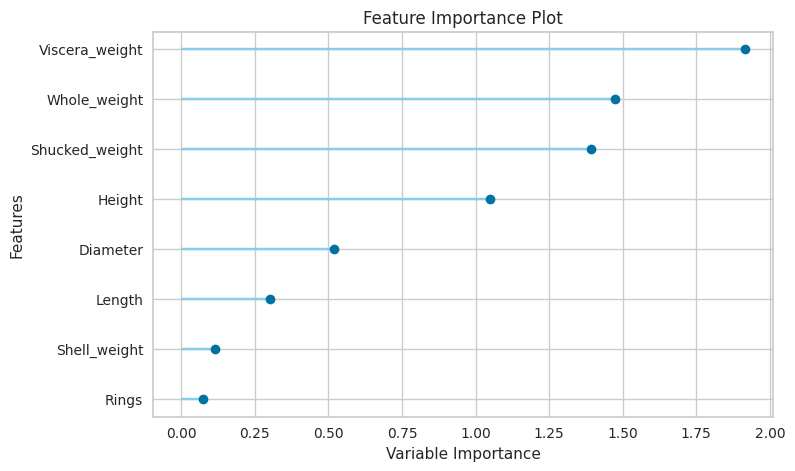

In [12]:
# plot feature importance
plot_model(best, plot = 'feature')

Next, correlation analysis showed extreme redundancy among several original features:  
- **Length** and **Diameter** are correlated at 0.99 (basically duplicate information)  
- **Shell_weight** is correlated >0.96 with total weight and its components (highly redundant)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

Correlation Matrix (excluding Sex):
                Length  Diameter  Height  Whole_weight  Shucked_weight  \
Length            1.00      0.99    0.83          0.93            0.90   
Diameter          0.99      1.00    0.83          0.93            0.89   
Height            0.83      0.83    1.00          0.82            0.77   
Whole_weight      0.93      0.93    0.82          1.00            0.97   
Shucked_weight    0.90      0.89    0.77          0.97            1.00   
Viscera_weight    0.90      0.90    0.80          0.97            0.93   
Shell_weight      0.90      0.91    0.82          0.96            0.88   
Rings             0.56      0.57    0.56          0.54            0.42   

                Viscera_weight  Shell_weight  Rings  
Length                    0.90          0.90   0.56  
Diameter                  0.90          0.91   0.57  
Height                    0.80          0.82   0.56  
Whole_weight              0.97          0.96   0.54  
Shucked_weight            0

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

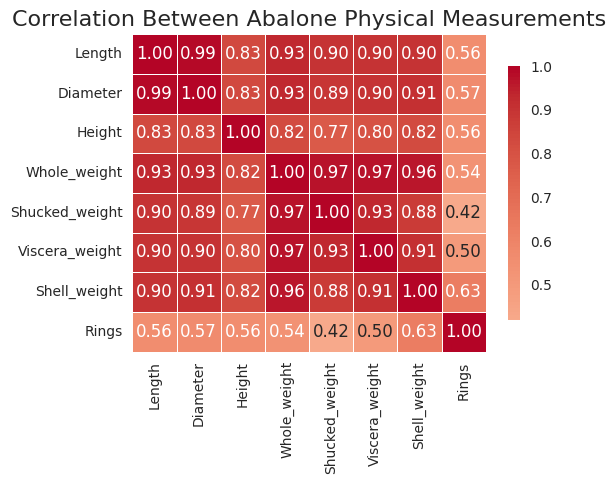

In [13]:
# Correlation matrix for all numerical features (Sex excluded)
numerical_features = data.drop(columns=['Sex'])
corr_matrix = numerical_features.corr().round(2)

print("Correlation Matrix (excluding Sex):")
print(corr_matrix)

# Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            linewidths=0.5, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Between Abalone Physical Measurements', fontsize=16)
plt.tight_layout()
plt.show()

Therefore, I removed **Length**, **Shell_weight**, and **Rings** (the lowest-ranked feature in the importance plot).  
Using only the remaining five non-redundant and high-importance features, the final model achieved **55.56% accuracy** (a slight improvement over the original 55.42% with all eight features) while being simpler.

In [14]:
# Test with the smart 5 features
smart_data = data[['Viscera_weight', 'Whole_weight', 'Shucked_weight', 
                   'Height', 'Diameter', 'Sex']]

setup(data=smart_data, target='Sex', session_id=123)

best_5 = compare_models()
best_5

,Description,Value
0,Session id,123
1,Target,Sex
2,Target type,Multiclass
3,Target mapping,"F: 0, I: 1, M: 2"
4,Original data shape,"(4177, 6)"
5,Transformed data shape,"(4177, 6)"
6,Transformed train set shape,"(2923, 6)"
7,Transformed test set shape,"(1254, 6)"
8,Numeric features,5
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5556,0.0000,0.5556,0.5508,0.5361,0.3275,0.3367,0.0270
svm,SVM - Linear Kernel,0.5474,0.0000,0.5474,0.5200,0.4942,0.3138,0.3436,0.0330
ridge,Ridge Classifier,0.5443,0.0000,0.5443,0.5317,0.5256,0.3142,0.3213,0.0200
lda,Linear Discriminant Analysis,0.5405,0.0000,0.5405,0.5348,0.5315,0.3063,0.3096,0.0190
ada,Ada Boost Classifier,0.5385,0.0000,0.5385,0.5256,0.5191,0.3029,0.3097,0.1290
gbc,Gradient Boosting Classifier,0.5361,0.0000,0.5361,0.5197,0.5201,0.3007,0.3049,0.8390
qda,Quadratic Discriminant Analysis,0.5309,0.0000,0.5309,0.5221,0.4925,0.2925,0.3092,0.0190
rf,Random Forest Classifier,0.5265,0.7161,0.5265,0.5185,0.5208,0.2885,0.2894,0.3980
nb,Naive Bayes,0.5248,0.7286,0.5248,0.5106,0.5050,0.2904,0.2972,0.0200
catboost,CatBoost Classifier,0.5207,0.7180,0.5207,0.5078,0.5114,0.2798,0.2812,1.9280


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Analyze Model
I used evaluate_model to open PyCaret’s evaluation panel and review the model’s performance across different metrics and plots.

In [15]:
evaluate_model(best_5)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### Prediction
Next, I generated predictions on the hold-out test set using the trained model and store the results in holdout_pred.

In [16]:
holdout_pred = predict_model(best_5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5415,0.7468,0.5415,0.5278,0.5174,0.3061,0.3151


In [17]:
holdout_pred.head()

,Viscera_weight,Whole_weight,Shucked_weight,Height,Diameter,Sex,prediction_label,prediction_score
1948,0.2975,1.2290,0.5055,0.165,0.515,M,F,0.5038
956,0.1435,0.6100,0.2720,0.135,0.400,M,I,0.4008
1341,0.2535,1.1710,0.5220,0.185,0.490,M,M,0.4876
821,0.0455,0.2215,0.0970,0.140,0.275,I,I,0.7525
569,0.1005,0.3870,0.1650,0.115,0.320,F,I,0.6048


### Model Generalization & Overfitting Check
The final logistic regression model achieved **55.56%** accuracy during 10-fold cross-validation and **54.15%** on the unseen hold-out set (a minimal drop of only 1.4 percentage points).  
This small and stable performance gap, combined with the use of a simple linear model and careful removal of redundant features, confirms that **the model does not suffer from overfitting** and generalizes well to new data.

### Save Model
Finally, I saved the entire trained pipeline to disk for later use.

In [18]:
save_model(best_5, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Viscera_weight', 'Whole_weight',
                                              'Shucked_weight', 'Height',
                                              'Diameter'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=Non...
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                          

In [19]:
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Viscera_weight', 'Whole_weight',
                                             'Shucked_weight', 'Height',
                                             'Diameter'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fil...
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent'))),
                ('trained_model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=123,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)